In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('flights.csv')

# Display the first few rows and check for missing values
display(df.head())
display(df.isnull().sum())

Origin Destination Origin City Origin State Destination City  \
0    EUG         RDM      Eugene           OR             Bend   
1    EUG         RDM      Eugene           OR             Bend   
2    EUG         RDM      Eugene           OR             Bend   
3    MFR         RDM     Medford           OR             Bend   
4    MFR         RDM     Medford           OR             Bend   

  Destination State  Passengers  Seats  Flights  Distance  Fly Date  \
0                OR          41    396       22     103.0    199011   
1                OR          88    342       19     103.0    199012   
2                OR          11     72        4     103.0    199010   
3                OR           0     18        1     156.0    199002   
4                OR          11     18        1     156.0    199003   

   Origin Population  Destination Population  
0             284093                   76034  
1             284093                   76034  
2             284093                   76034  
3             147300                   76034  
4             147300                   76034

Origin                    0
Destination               0
Origin City               0
Origin State              0
Destination City          0
Destination State         0
Passengers                0
Seats                     0
Flights                   0
Distance                  0
Fly Date                  0
Origin Population         0
Destination Population    0
dtype: int64

In [2]:
display(df.describe())

Passengers         Seats       Flights      Distance      Fly Date  \
count  3.606802e+06  3.606802e+06  3.606802e+06  3.606802e+06  3.606802e+06   
mean   2.688911e+03  4.048298e+03  3.722891e+01  6.973192e+02  2.000634e+05   
std    4.347617e+03  6.200872e+03  4.961970e+01  6.044165e+02  5.746699e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.990010e+05   
25%    1.090000e+02  1.560000e+02  2.000000e+00  2.730000e+02  1.996030e+05   
50%    1.118000e+03  1.998000e+03  2.500000e+01  5.190000e+02  2.001110e+05   
75%    3.503000e+03  5.370000e+03  5.500000e+01  9.270000e+02  2.006010e+05   
max    8.959700e+04  1.470620e+05  1.128000e+03  5.095000e+03  2.009120e+05   

       Origin Population  Destination Population  
count       3.606802e+06            3.606802e+06  
mean        5.871504e+06            5.897984e+06  
std         7.858062e+06            7.906128e+06  
min         1.300500e+04            1.288700e+04  
25%         1.030597e+06            1.025470e+06  
50%         2.400193e+06            2.400193e+06  
75%         8.613622e+06            8.635706e+06  
max         3.813959e+07            3.813959e+07

In [3]:
# Specify numerical and categorical columns
numerical_cols = ['Passengers', 'Seats', 'Flights', 'Distance', 'Origin Population', 'Destination Population']
categorical_cols = ['Origin', 'Destination', 'Origin City', 'Origin State', 'Destination City', 'Destination State']

#  Histogram plots for each variable with statistics

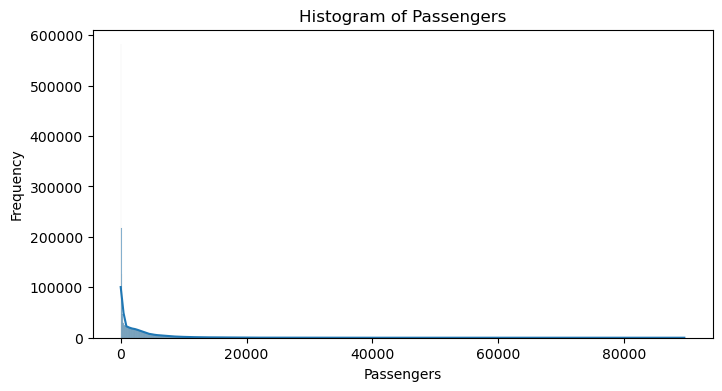

Passengers - Max: 89597, Min: 0, Mean: 2688.9111728339954, Median: 1118.0
Outliers in Passengers: [13889 23868 10341 ... 23162 16426 20701]


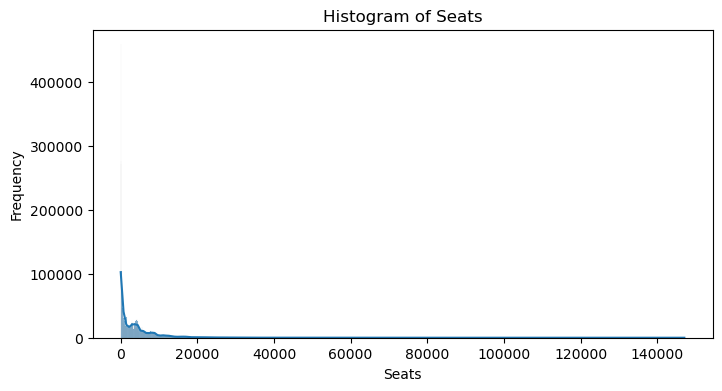

Seats - Max: 147062, Min: 0, Mean: 4048.298482977441, Median: 1998.0
Outliers in Seats: [23427 40874 16398 ... 25312 20852 23232]


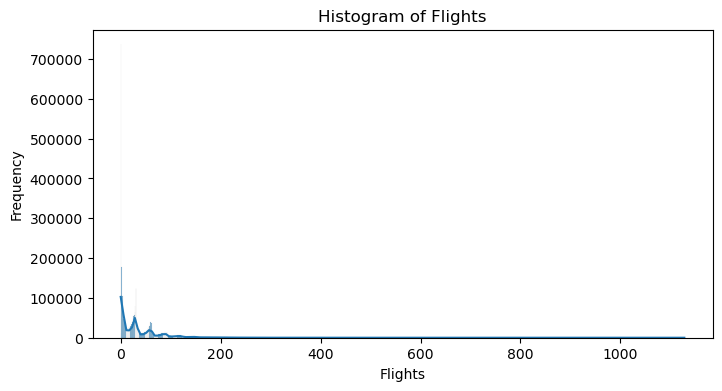

Flights - Max: 1128, Min: 0, Mean: 37.22890860102662, Median: 25.0
Outliers in Flights: [161 187 154 ... 150 136 138]


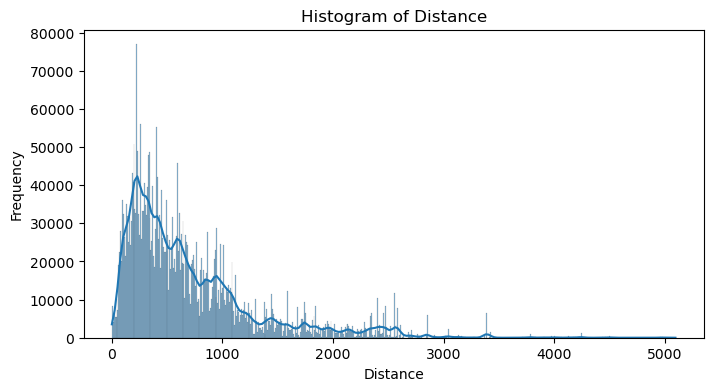

Distance - Max: 5095.0, Min: 0.0, Mean: 697.3191555843653, Median: 519.0
Outliers in Distance: [2601. 1912. 2065. ... 3355. 3355. 2467.]


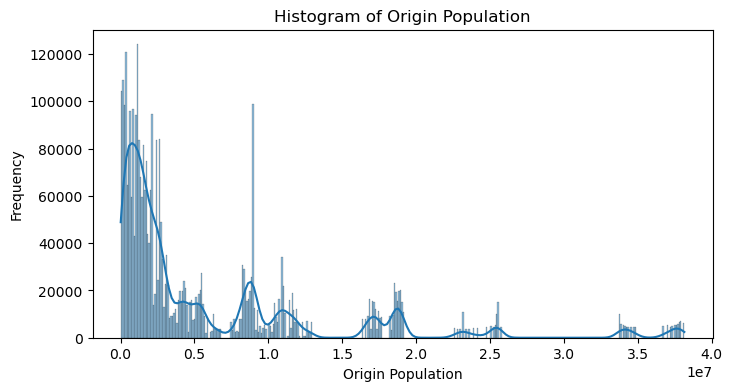

Origin Population - Max: 38139592, Min: 13005, Mean: 5871504.093003442, Median: 2400193.0
Outliers in Origin Population: [22585772 22585772 22585772 ... 23326070 23326070 23326070]


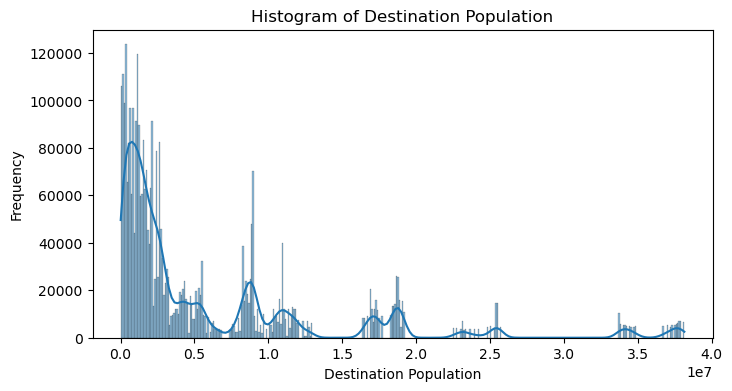

Destination Population - Max: 38139592, Min: 12887, Mean: 5897984.052518547, Median: 2400193.0
Outliers in Destination Population: [33737966 33737966 33737966 ... 25749594 25749594 25749594]


In [4]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    # Display summary statistics for each numerical column
    print(f"{col} - Max: {df[col].max()}, Min: {df[col].min()}, Mean: {df[col].mean()}, Median: {df[col].median()}")
    
    # Identify outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Outliers in {col}: {outliers[col].values}")

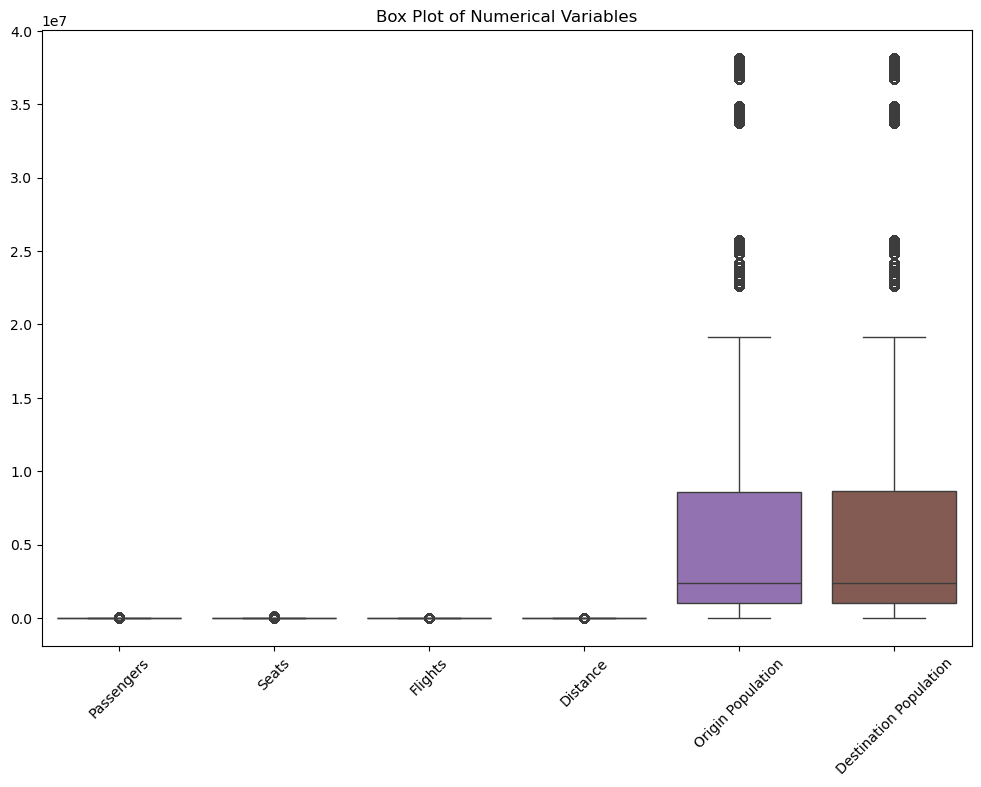

In [5]:
# Create a box plot for all numerical variables side-by-side
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Variables")
plt.show()

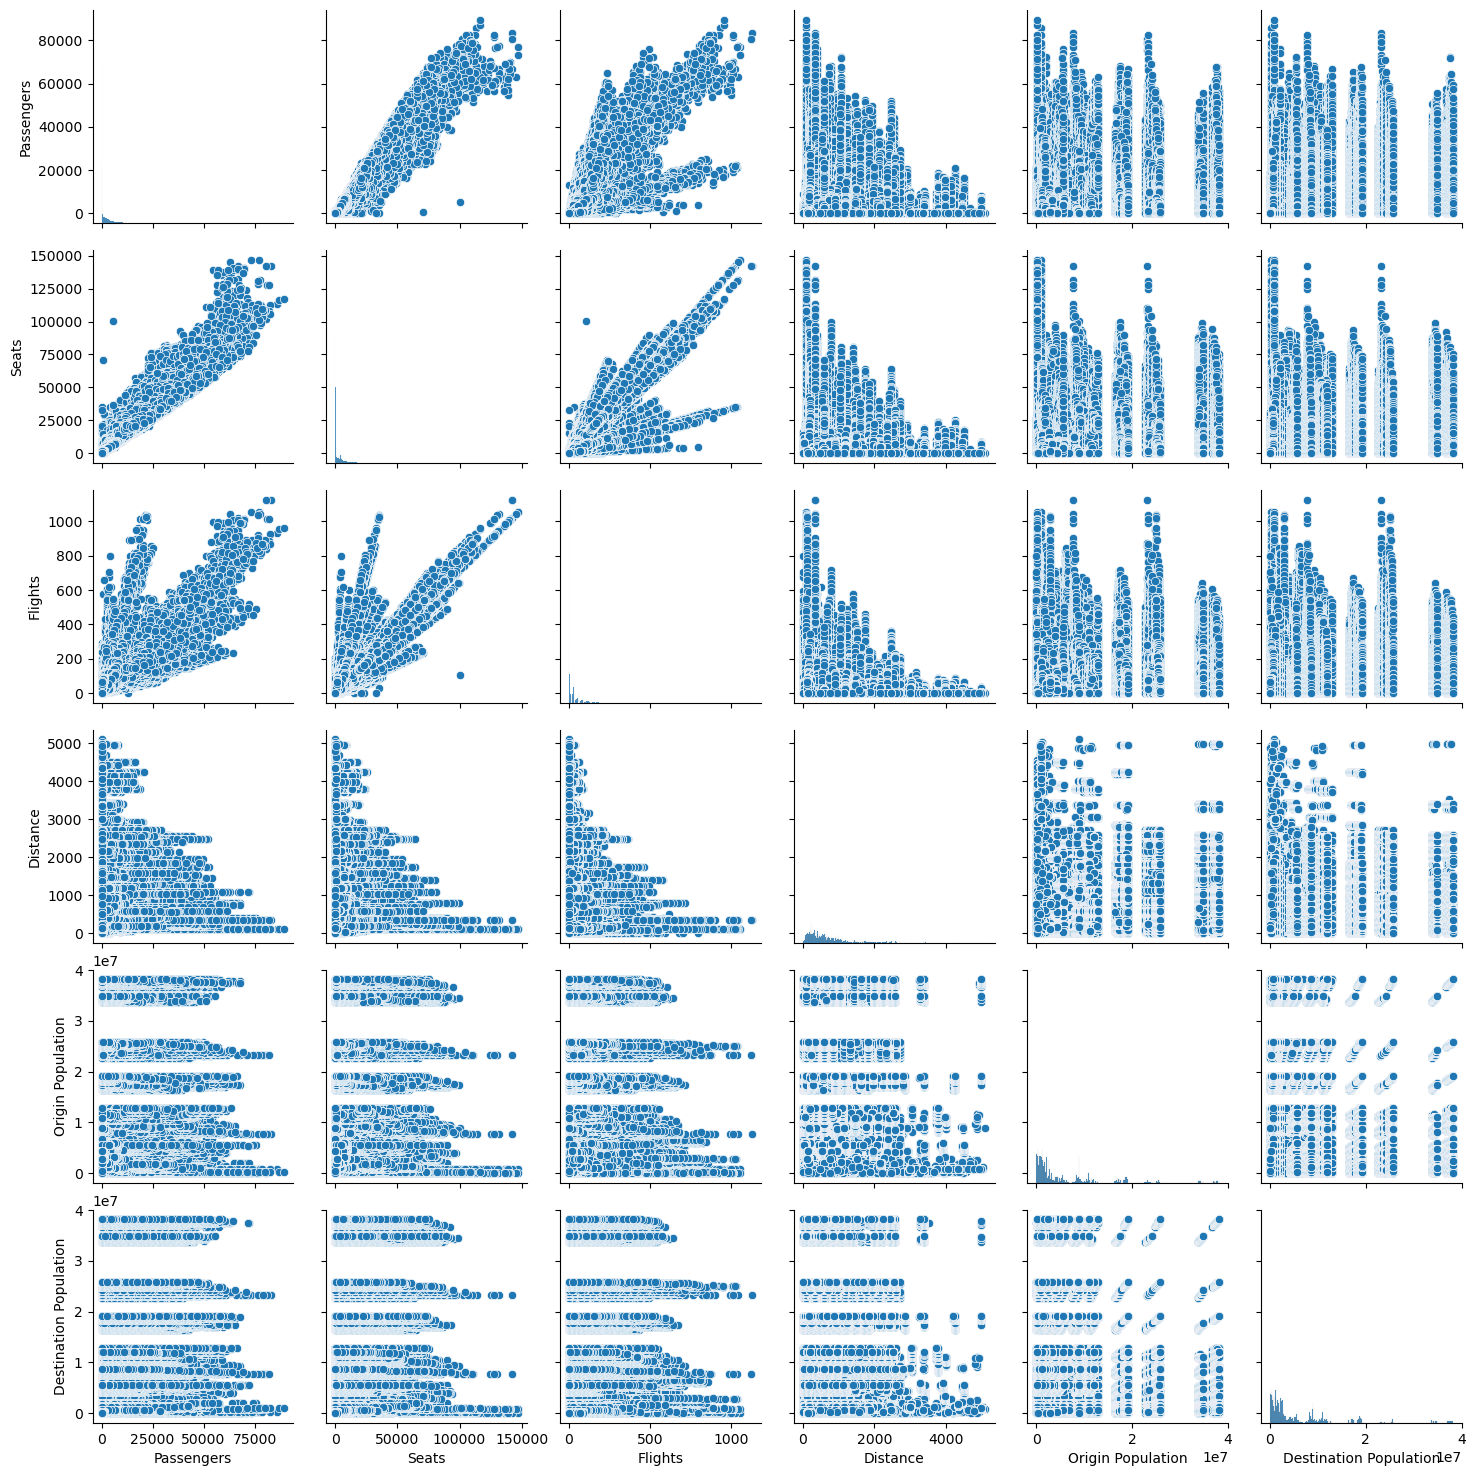

In [6]:
sns.pairplot(df[numerical_cols])
plt.show()

# Create bar charts for each categorical variable

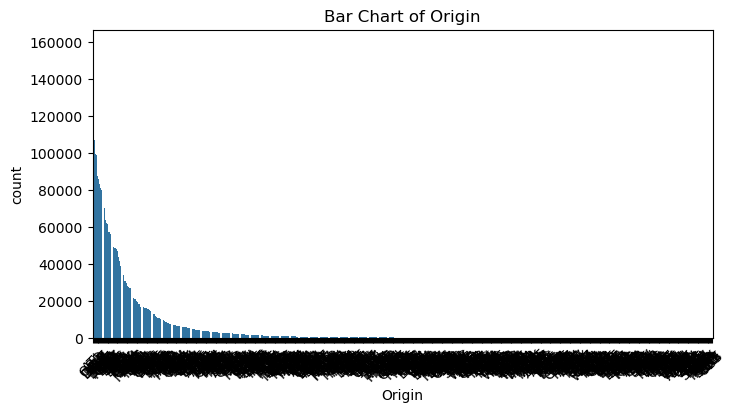

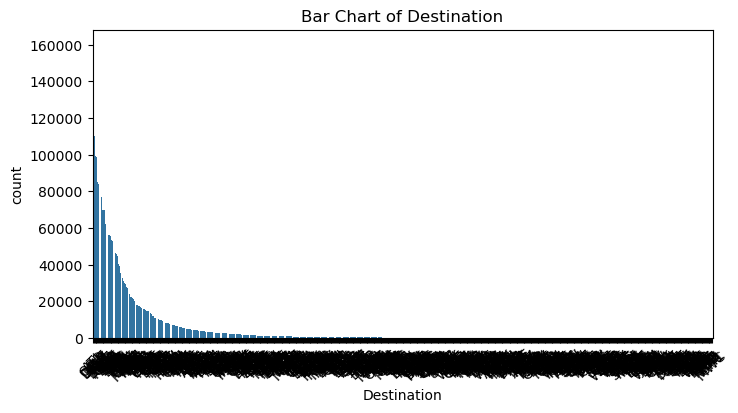

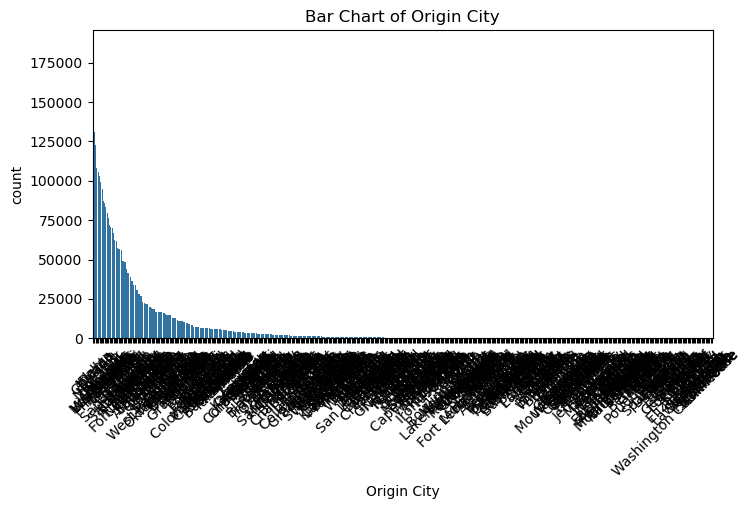

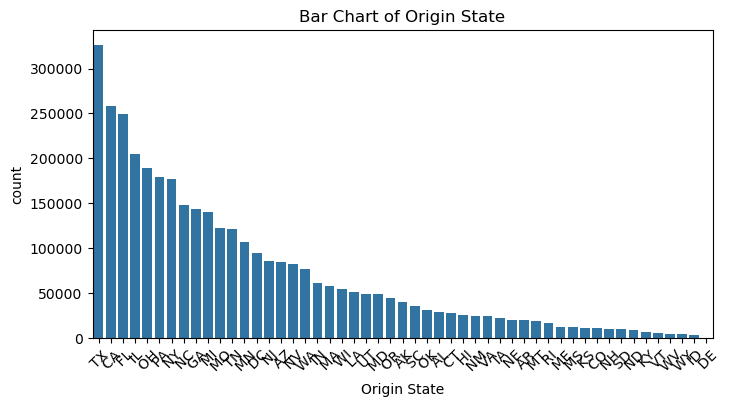

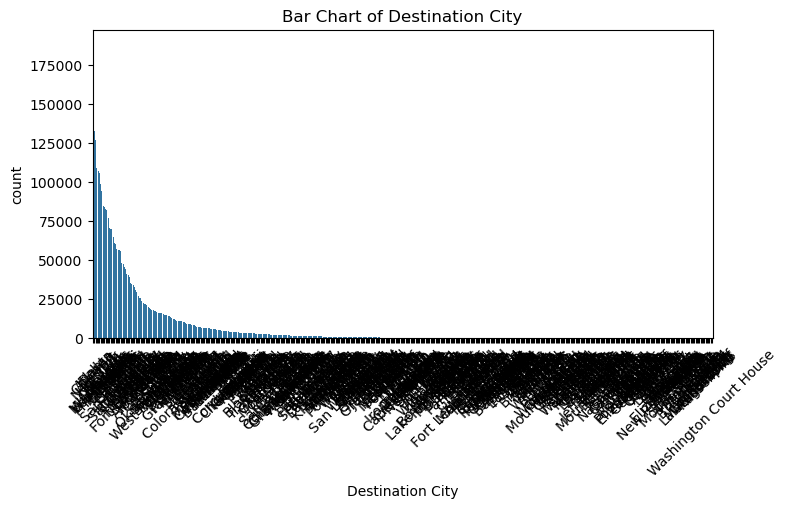

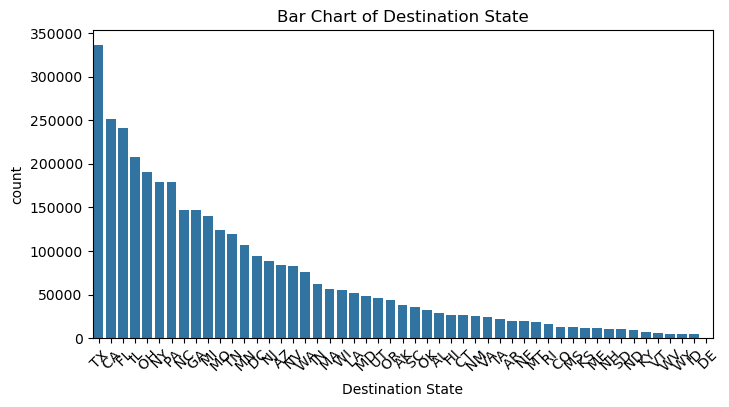

In [8]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.show()


# Plot relationships between categorical and numerical variables using box plots

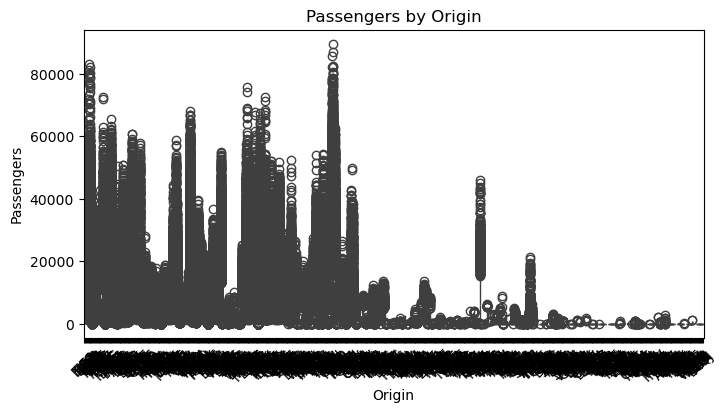

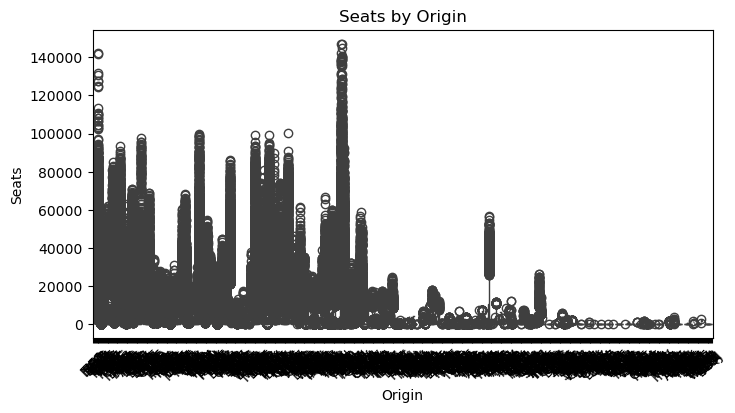

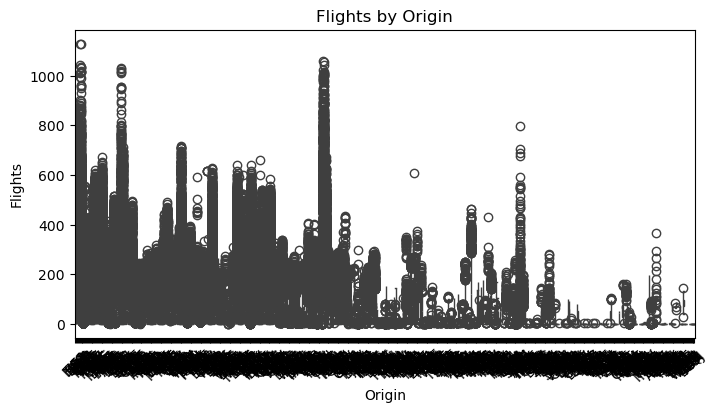

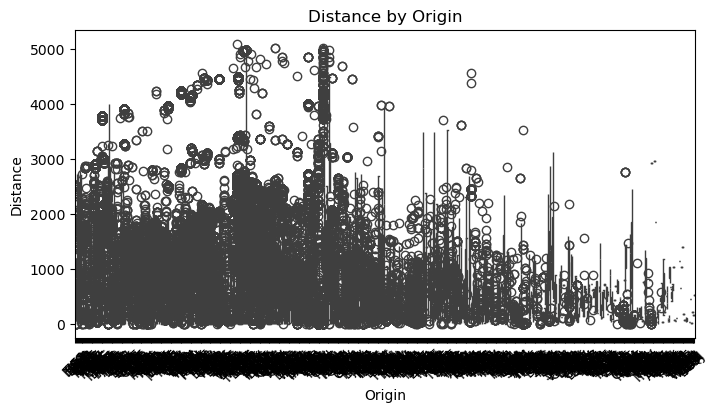

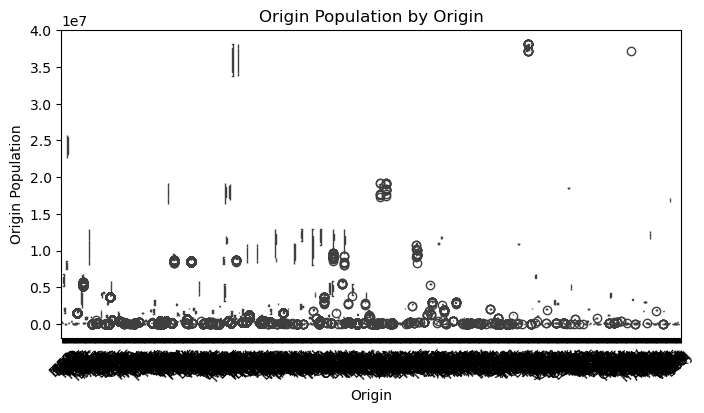

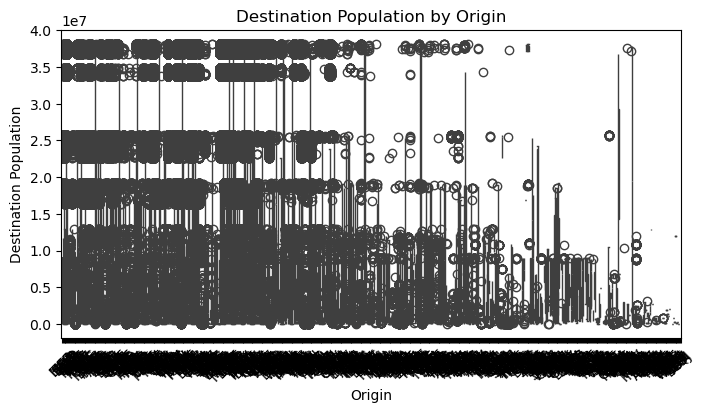

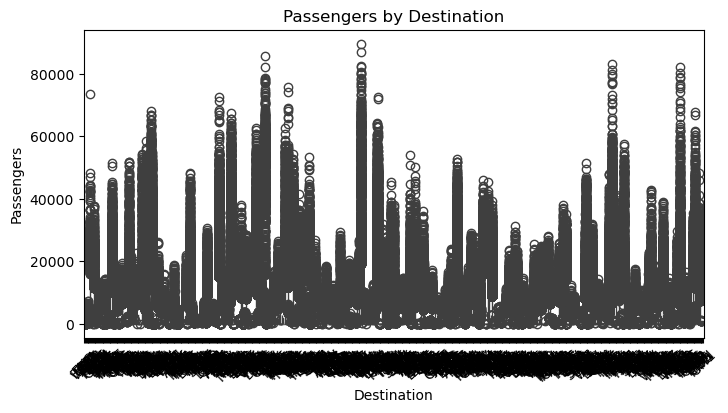

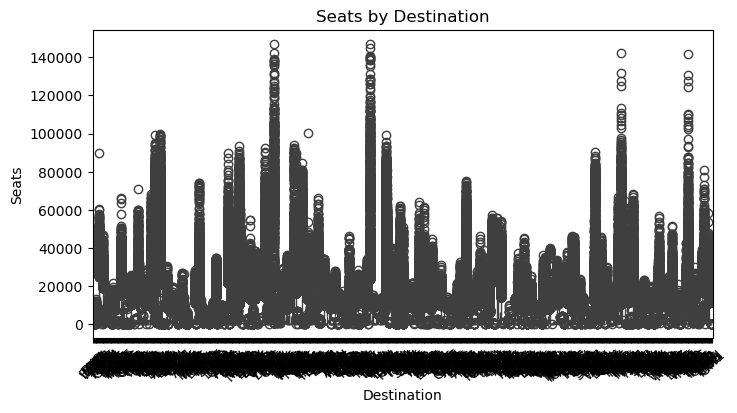

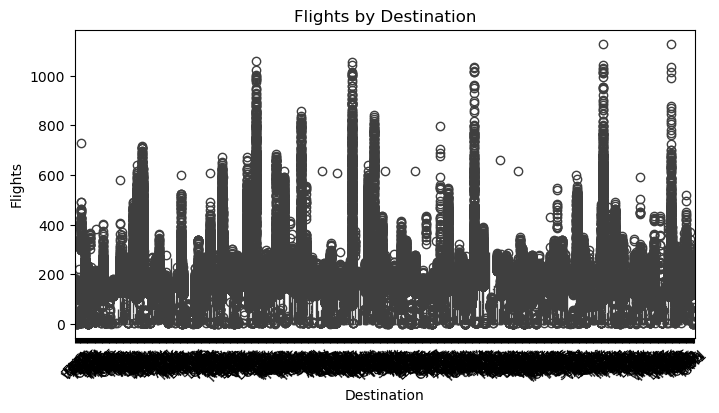

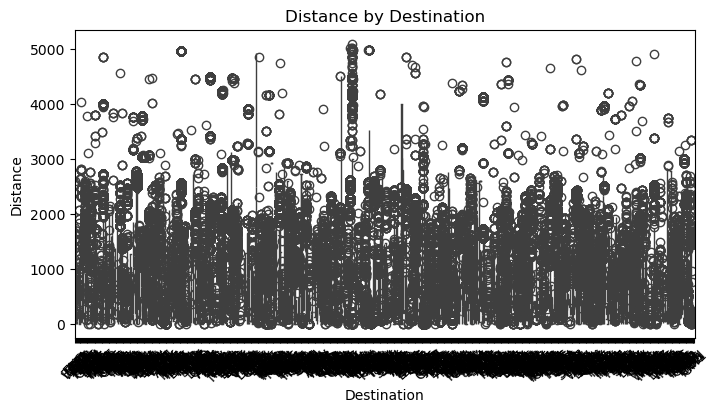

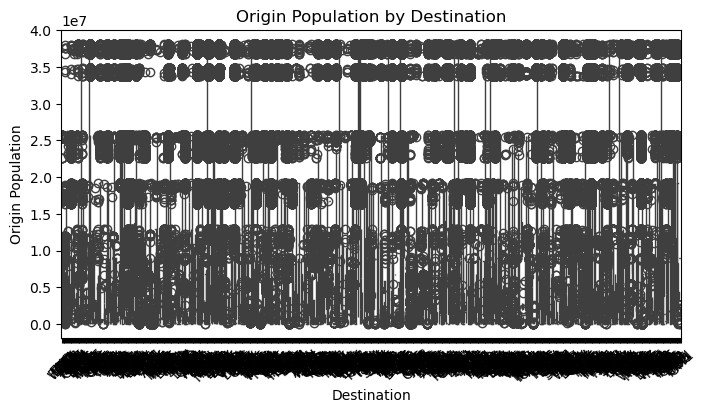

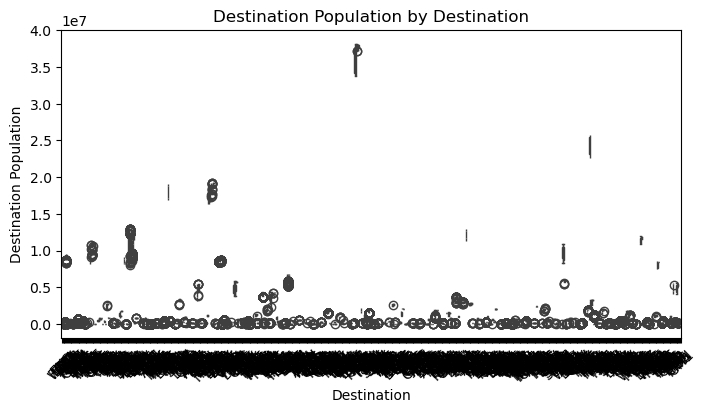

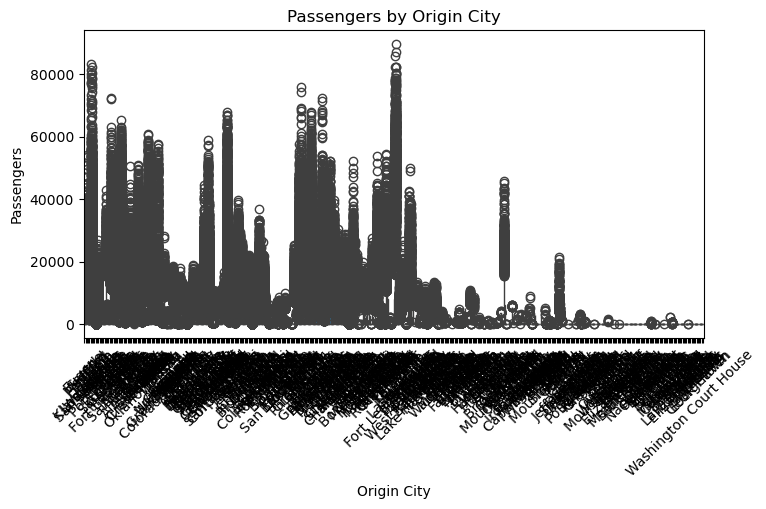

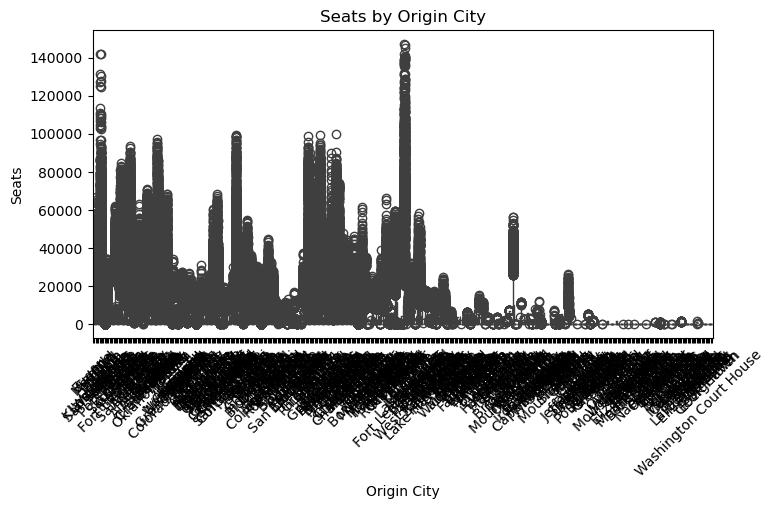

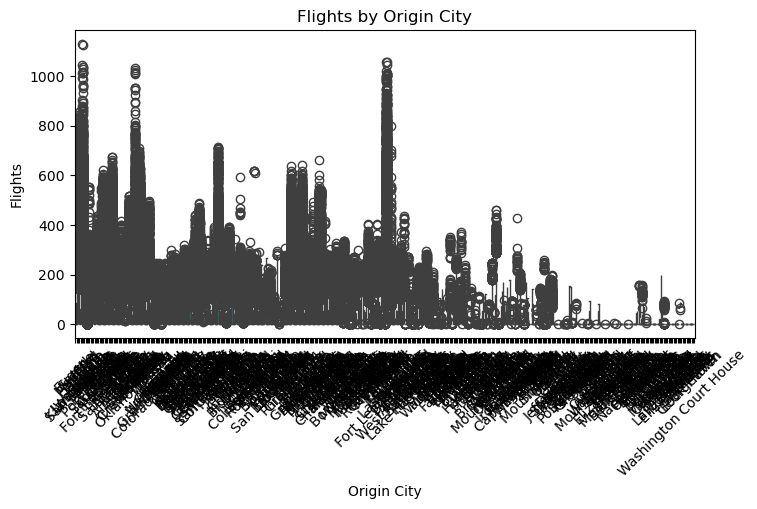

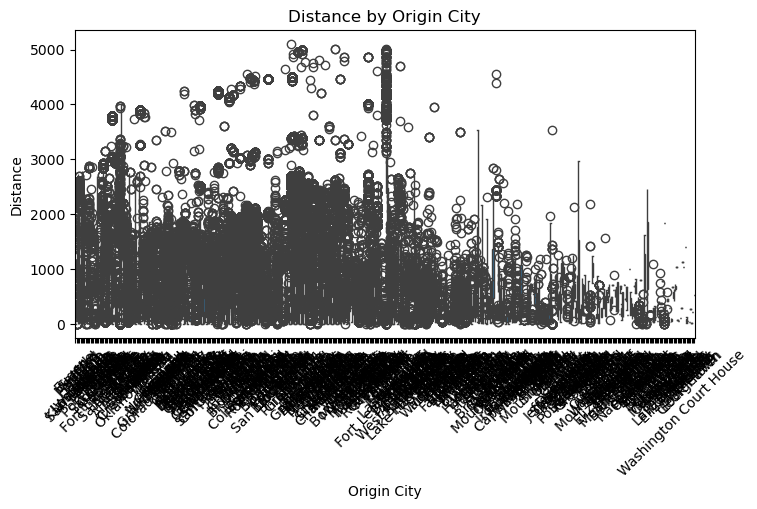

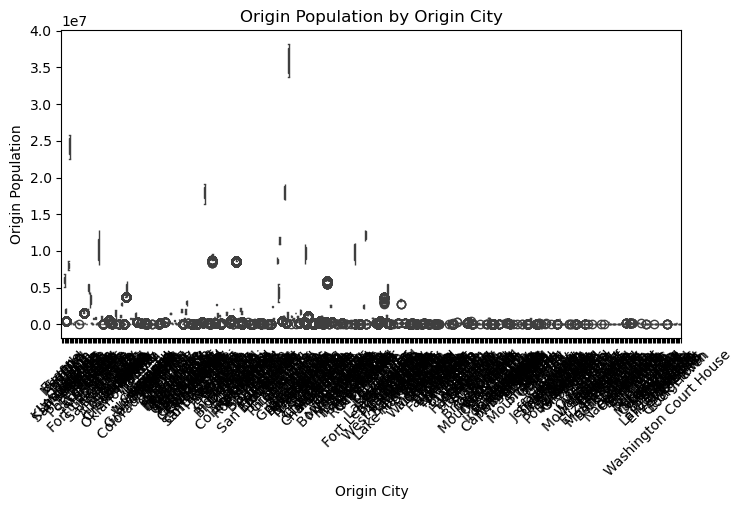

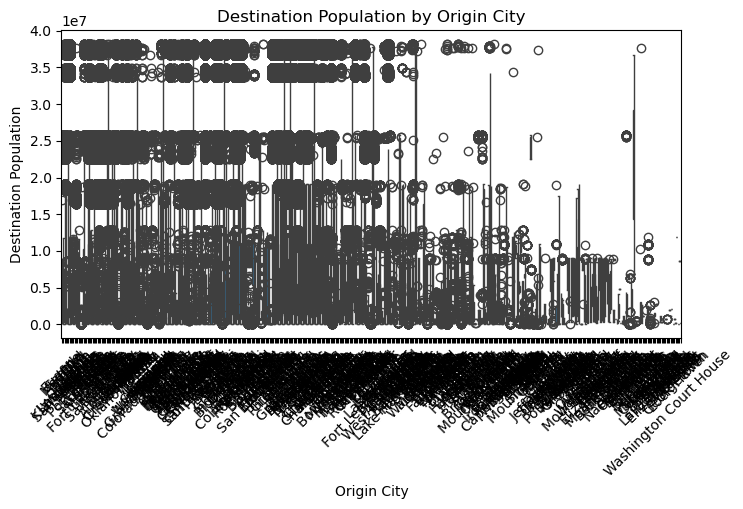

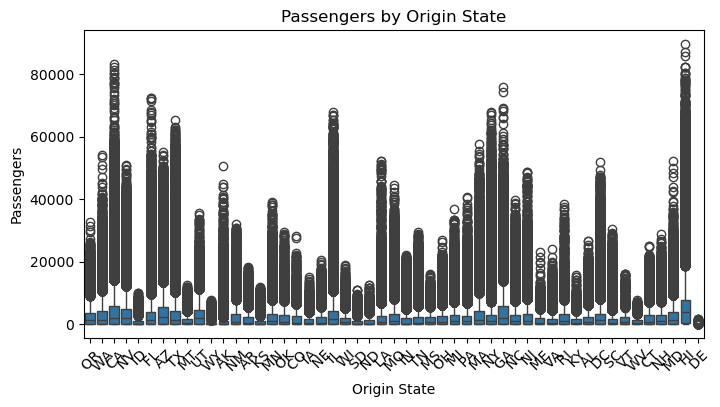

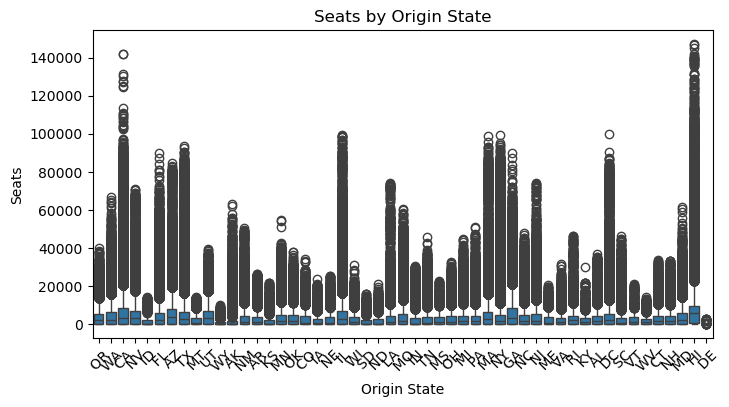

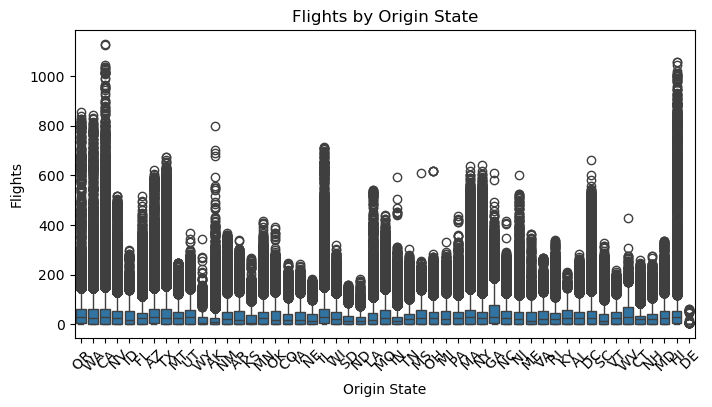

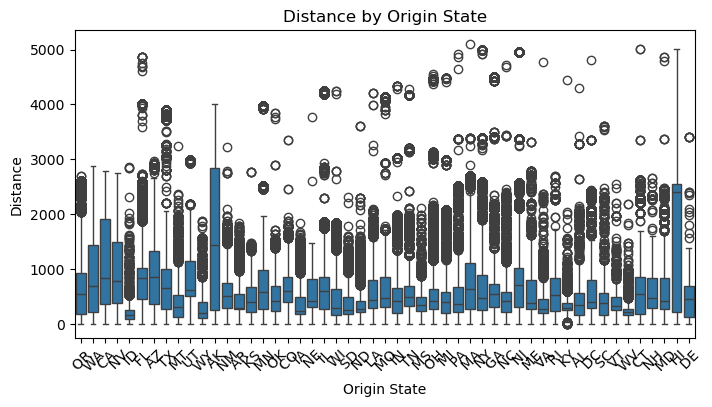

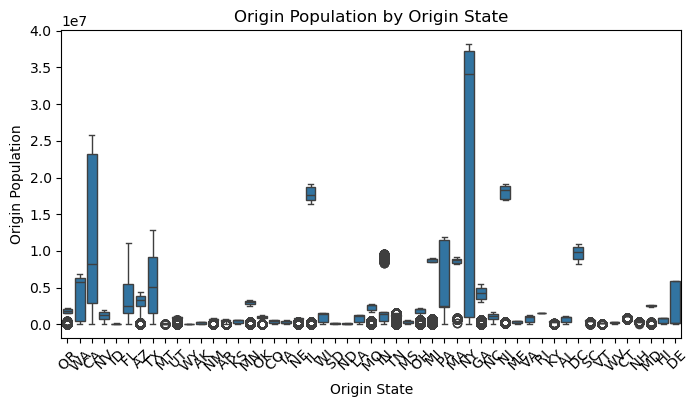

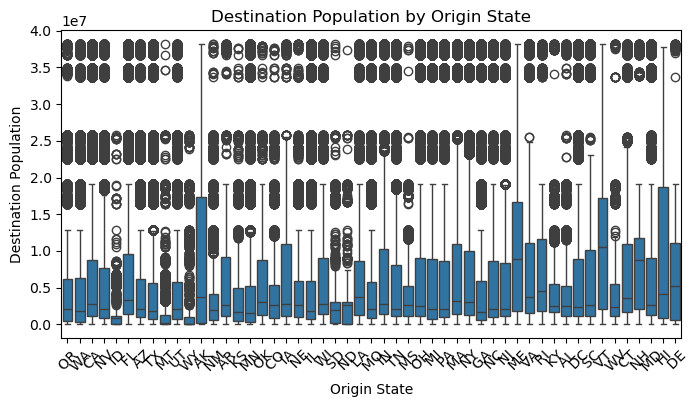

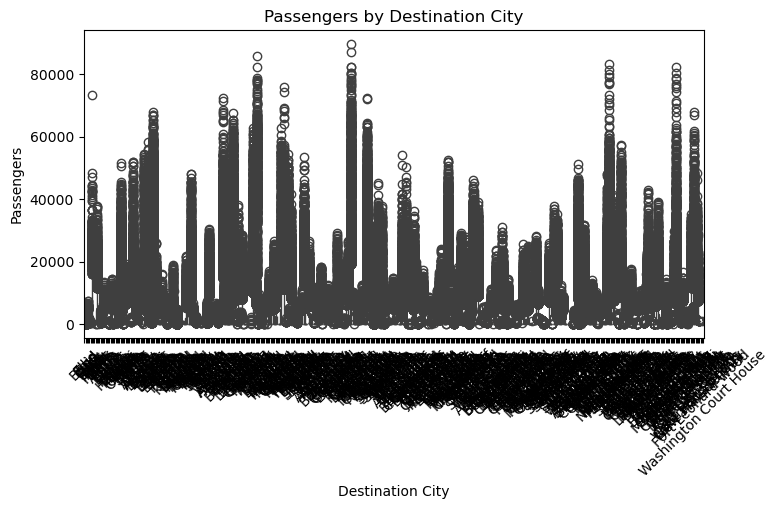

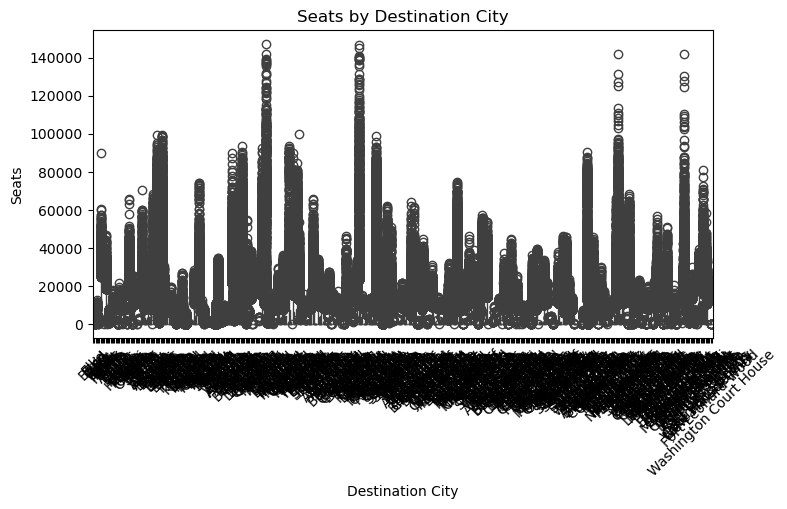

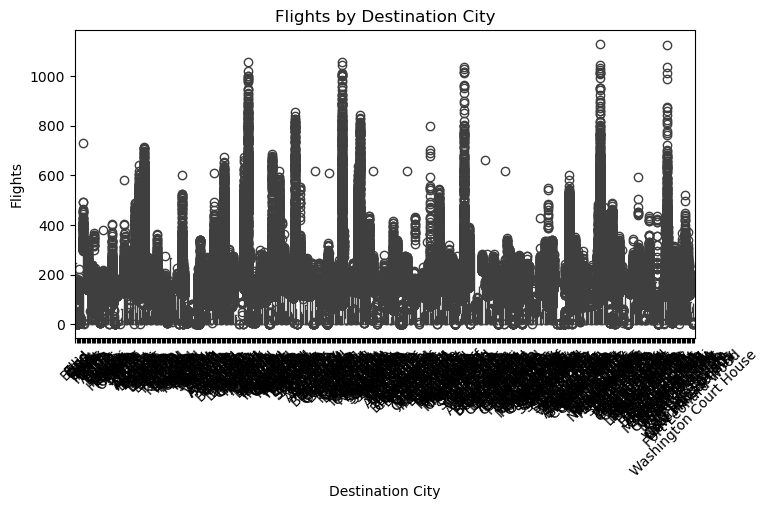

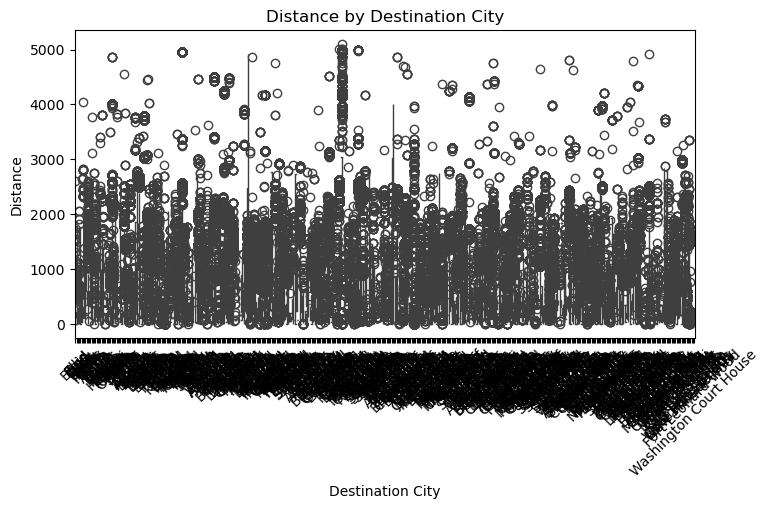

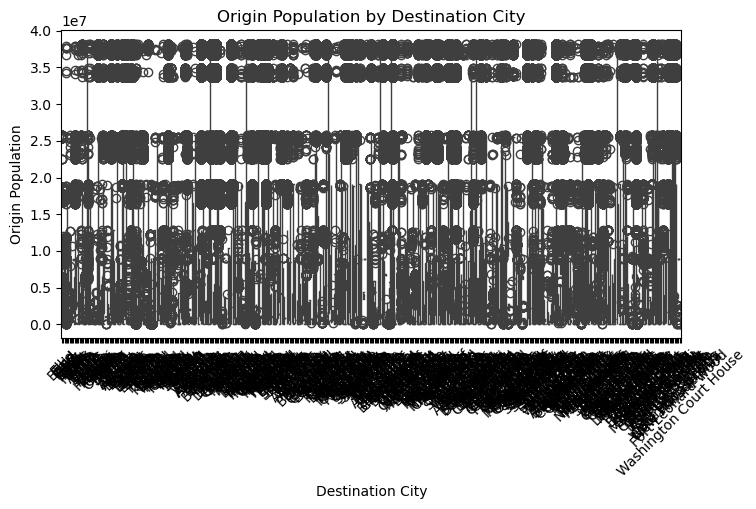

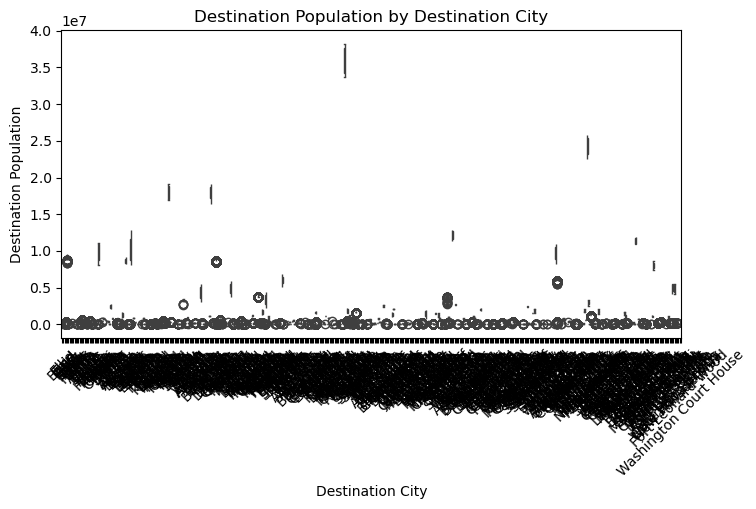

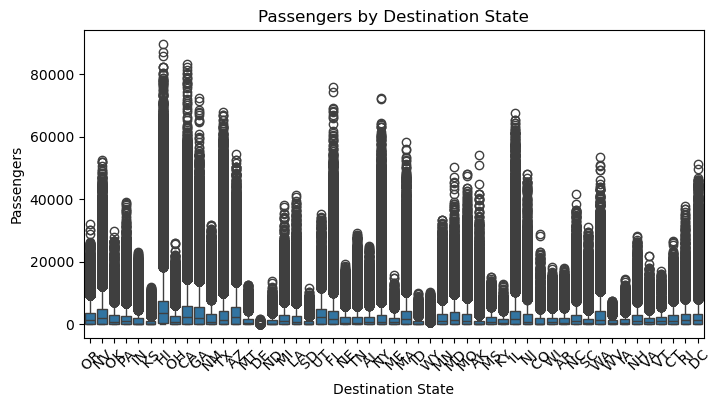

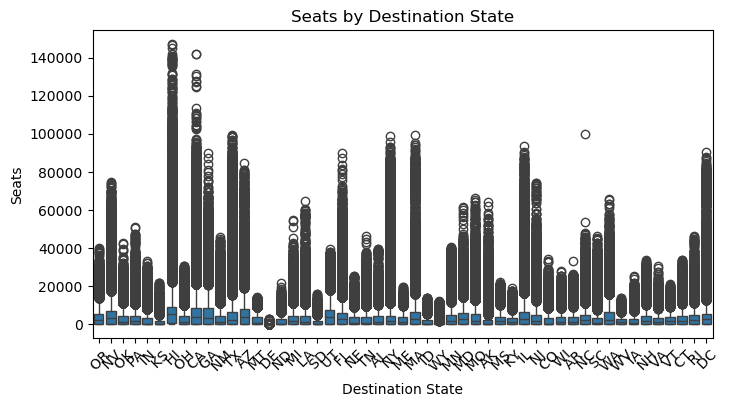

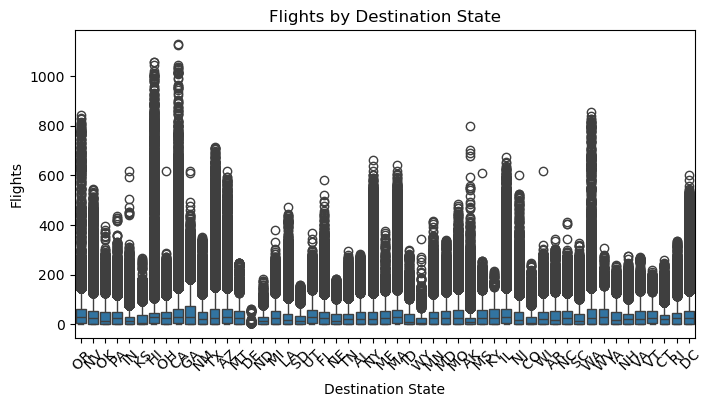

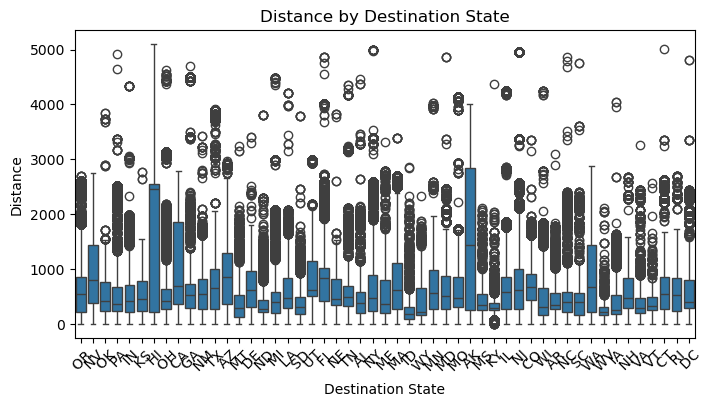

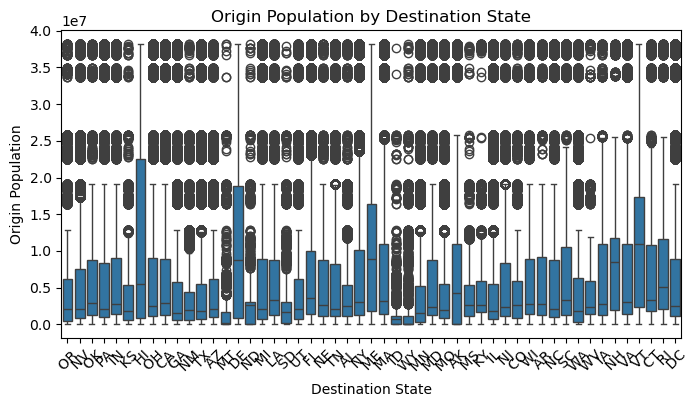

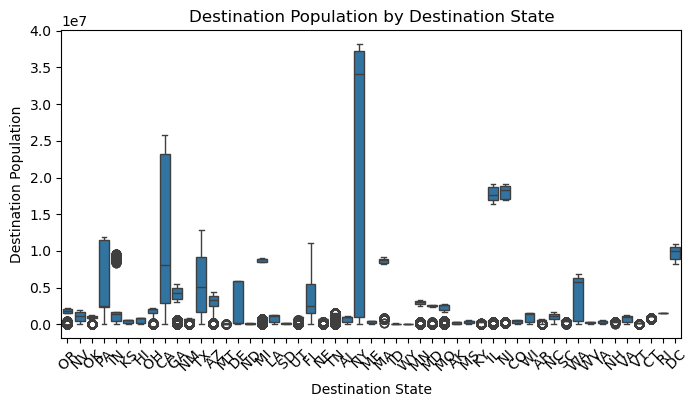

In [9]:
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()
